In [1]:
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

import leader_implementation as lead

In [2]:
def create_gaussian_dataset(samples = 2000, dimensions=5, clusters=3):
        np.random.seed(42)  # For reproducibility

        # Parameters for the Gaussian distributions
        num_dimensions = dimensions
        num_samples = samples
        num_clusters = clusters
        samples_per_cluster = num_samples // num_clusters

        # Means for the Gaussian distributions (randomly chosen)
        means = [np.random.rand(num_dimensions) * 10 for _ in range(num_clusters)]

        # Covariance matrices for the Gaussian distributions (randomly chosen, positive definite)
        covariances = [np.diag(np.random.rand(num_dimensions) + 0.1) for _ in range(num_clusters)]

        # Generate samples for each cluster
        X = []
        y = []
        for cluster_id in range(num_clusters):
            cluster_data = np.random.multivariate_normal(means[cluster_id], covariances[cluster_id], samples_per_cluster)
            X.append(cluster_data)
            y.append(np.full(samples_per_cluster, cluster_id))

        # Concatenate the data and labels
        X = np.vstack(X)
        y = np.concatenate(y)
        
        column_names = [f'Feature_{i}' for i in range(X.shape[1])]  # Create column names for features
        X = pd.DataFrame(X, columns=column_names)

        return X, y

In [3]:
dataset = 2

if dataset == 1:
    # fetch dataset 
    adult = fetch_ucirepo(id=2) 
    
    # data (as pandas dataframes) 
    X = adult.data.features 
    y = adult.data.targets 

    varinfo = adult.variables

    varinfo.loc[varinfo['name'] == 'sex', 'type'] = 'Categorical'

elif dataset == 2:
    # fetch dataset 
    heart_disease = fetch_ucirepo(id=45) 
    
    # data (as pandas dataframes) 
    X = heart_disease.data.features 
    y = heart_disease.data.targets 

    varinfo = heart_disease.variables

    varinfo.loc[varinfo['name'] == 'fbs', 'type'] = 'Binary'
    varinfo.loc[varinfo['name'] == 'exang', 'type'] = 'Binary'

elif dataset == 3:
    # Create the dataset
    X, y = create_gaussian_dataset(20000, 8, 5)
    varinfo_dict = {i: {'name': X.columns[i], 'type': 'Continuous'} for i in range(len(X.columns))}  
    varinfo = pd.DataFrame(varinfo_dict).transpose()

elif dataset == 4:
    X, y = create_gaussian_dataset(20000, 53, 9)
    varinfo_dict = {i: {'name': X.columns[i], 'type': 'Continuous'} for i in range(len(X.columns))}  
    varinfo = pd.DataFrame(varinfo_dict).transpose()

varinfo

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Binary,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Binary,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


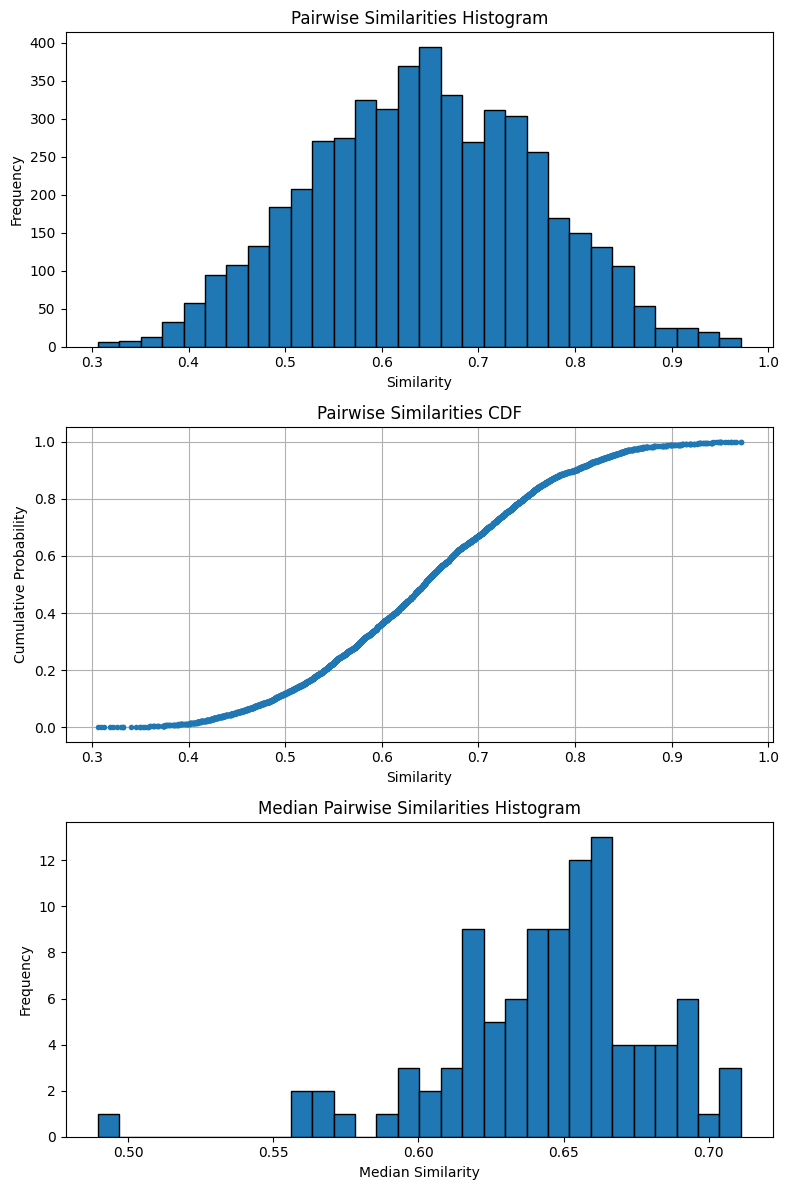

Mean similarity: 0.6435453366123315
Quartiles: [0.5592187  0.6435898  0.72818816]


In [4]:
leader = lead.LeaderAlgorithms(X, varinfo, similarity_func='gower', seed=42)

In [5]:
s_min = 0.6

### Leader

In [6]:
k, leaders, clusters = leader.Leader(s_min=s_min)

                 Leader                 

=========SUMMARY OF STATISTICS==========

Algorithm executed in 1.6908354759216309 seconds

6 clusters have been found:

 Cluster 1     Leader: 0
               Size: 110
               Average similarity: 0.6664
----------------------------------------
 Cluster 2     Leader: 1
               Size: 76
               Average similarity: 0.7000
----------------------------------------
 Cluster 3     Leader: 4
               Size: 88
               Average similarity: 0.7397
----------------------------------------
 Cluster 4     Leader: 14
               Size: 25
               Average similarity: 0.7967
----------------------------------------
 Cluster 5     Leader: 91
               Size: 3
               Average similarity: 0.8314
----------------------------------------
 Cluster 6     Leader: 152
               Size: 1
               Average similarity: 1.0000
----------------------------------------


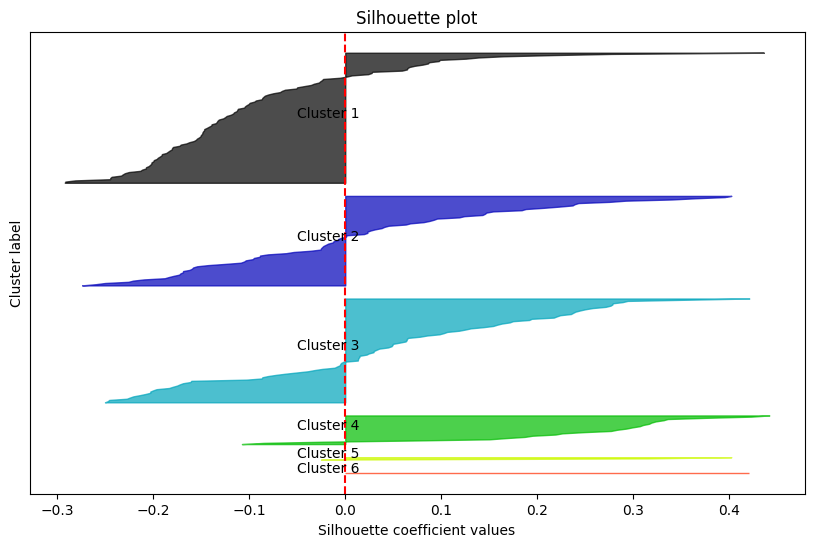

Cluster 1 has average silhouette width: -0.09654102239510937
Cluster 2 has average silhouette width: 0.006331437135648214
Cluster 3 has average silhouette width: 0.03430039593712692
Cluster 4 has average silhouette width: 0.23528998726963773
Cluster 5 has average silhouette width: 0.23069081263096236
Cluster 6 has average silhouette width: 0.42081409334539555
For the entire dataset, the average silhouette width is: -0.00041172338516953295


In [8]:
leader.plot_silhouette()

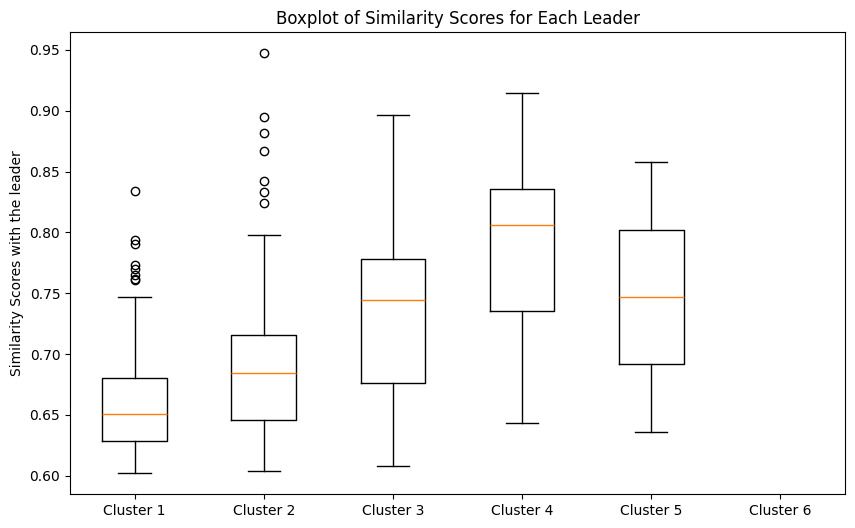

In [9]:
leader.cluster_boxplots()

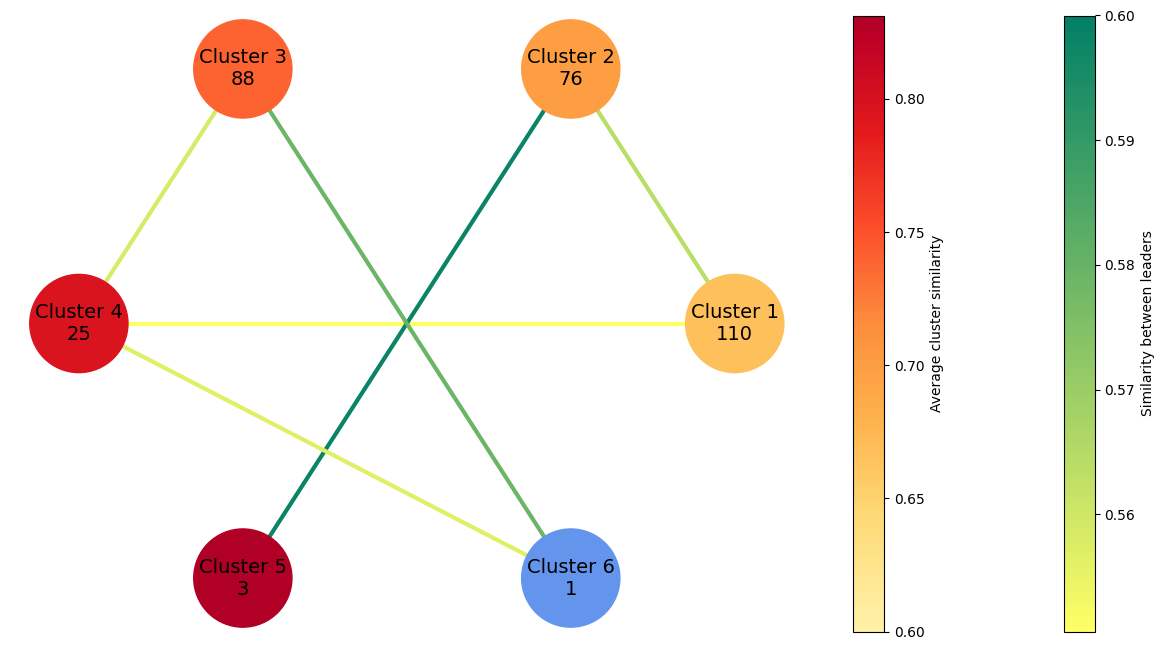

In [10]:
leader.plot_graph()

c:\Users\marti\Desktop\educacio\DADES\TFG\implementation\leader_implementation.py:1262: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(bars, rotation=45, ha='right')


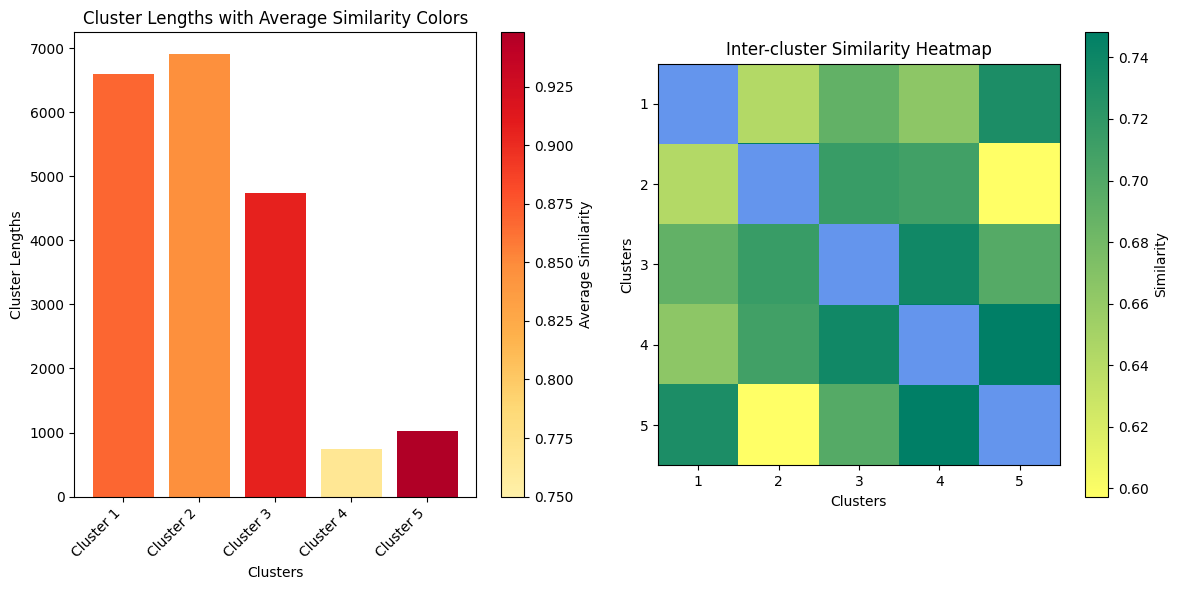

In [10]:
leader.plot_clustering_summary()

### Leader2

In [11]:
k2, leaders2, clusters2 = leader.Leader2(s_min=s_min)

                Leader2                 

=========SUMMARY OF STATISTICS==========

Algorithm executed in 2.9105796813964844 seconds

5 clusters have been found:

 Cluster 1     Leader: 0
               Size: 4000
               Average similarity: 0.9344
----------------------------------------
 Cluster 2     Leader: 4000
               Size: 4002
               Average similarity: 0.9002
----------------------------------------
 Cluster 3     Leader: 8000
               Size: 4265
               Average similarity: 0.9210
----------------------------------------
 Cluster 4     Leader: 12649
               Size: 3733
               Average similarity: 0.8933
----------------------------------------
 Cluster 5     Leader: 16000
               Size: 4000
               Average similarity: 0.9436
----------------------------------------


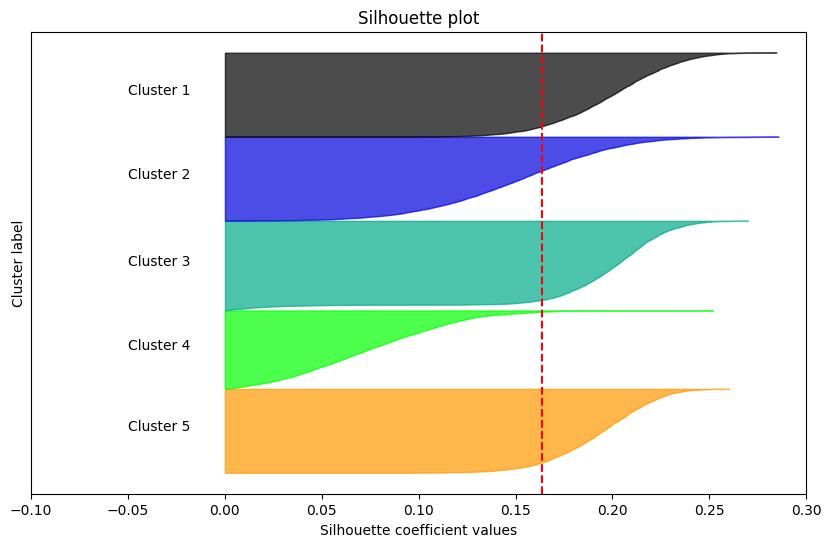

Cluster 1 has average silhouette width: 0.19874083748063762
Cluster 2 has average silhouette width: 0.1513855615337964
Cluster 3 has average silhouette width: 0.1906300345329244
Cluster 4 has average silhouette width: 0.07605019027612102
Cluster 5 has average silhouette width: 0.1933196051938808
For the entire dataset, the average silhouette width is: 0.16355096227700047


In [12]:
leader.plot_silhouette()

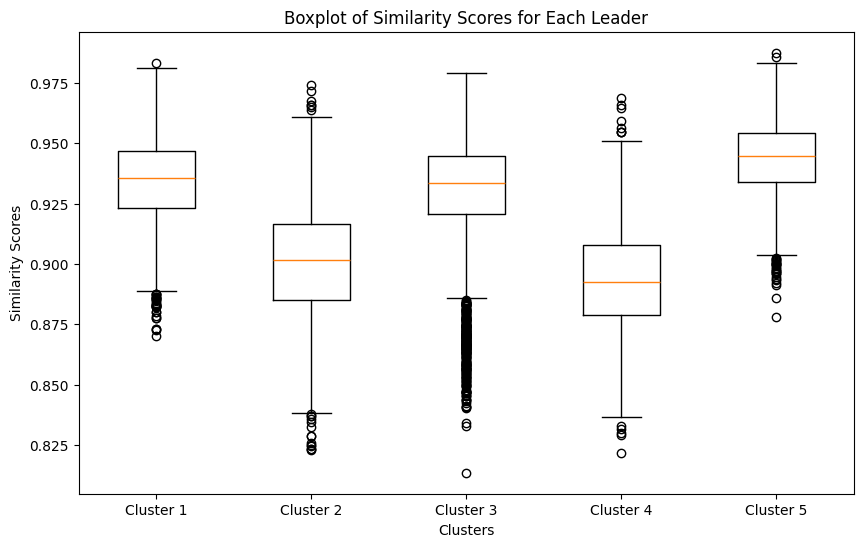

In [13]:
leader.cluster_boxplots()

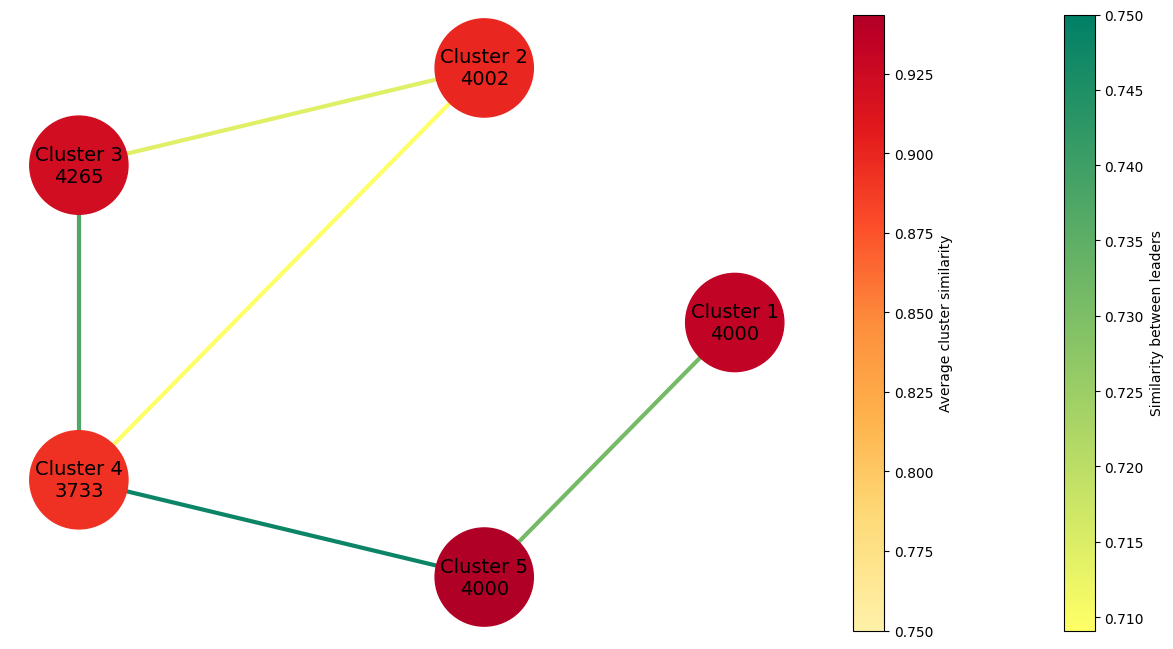

In [14]:
leader.plot_graph()

c:\Users\marti\Desktop\educacio\DADES\TFG\implementation\leader_implementation.py:1327: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(bars, rotation=45, ha='right')


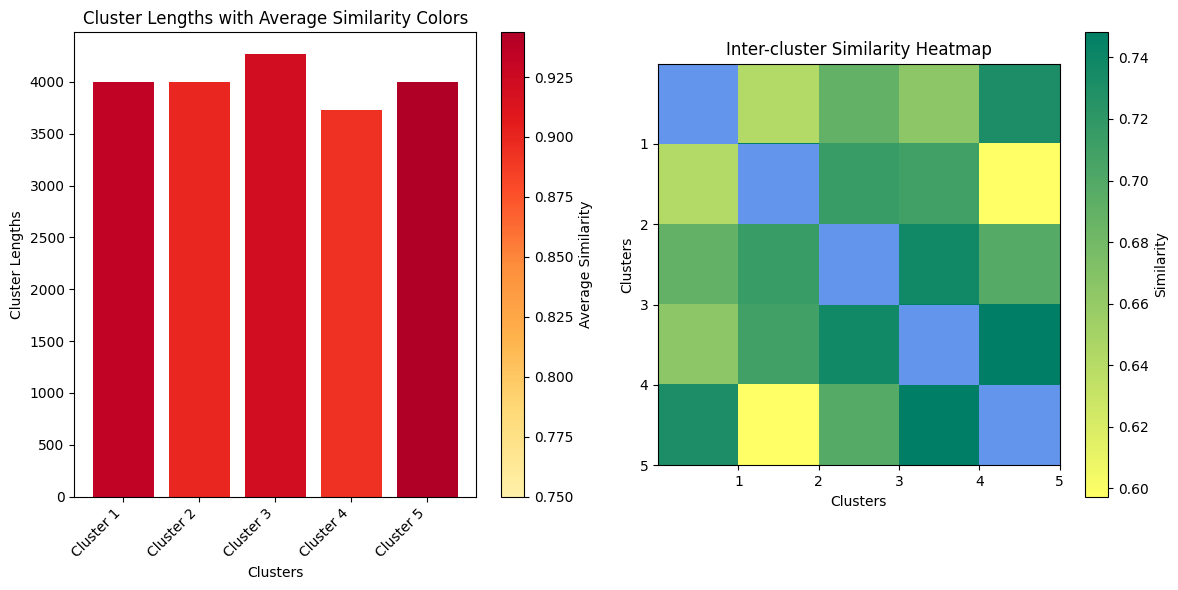

In [15]:
leader.plot_clustering_summary()

### Leader-Medoid

In [16]:
k_medoid, leaders_medoid, clusters_medoid = leader.Leader_Medoid(s_min=s_min)

             Leader Medoid              

=========SUMMARY OF STATISTICS==========

Algorithm executed in 14.990272521972656 seconds

4 clusters have been found:

 Cluster 1     Leader: 2367
               Size: 4002
               Average similarity: 0.9486
----------------------------------------
 Cluster 2     Leader: 4674
               Size: 4208
               Average similarity: 0.9295
----------------------------------------
 Cluster 3     Leader: 11660
               Size: 7790
               Average similarity: 0.9070
----------------------------------------
 Cluster 4     Leader: 19991
               Size: 4000
               Average similarity: 0.9495
----------------------------------------


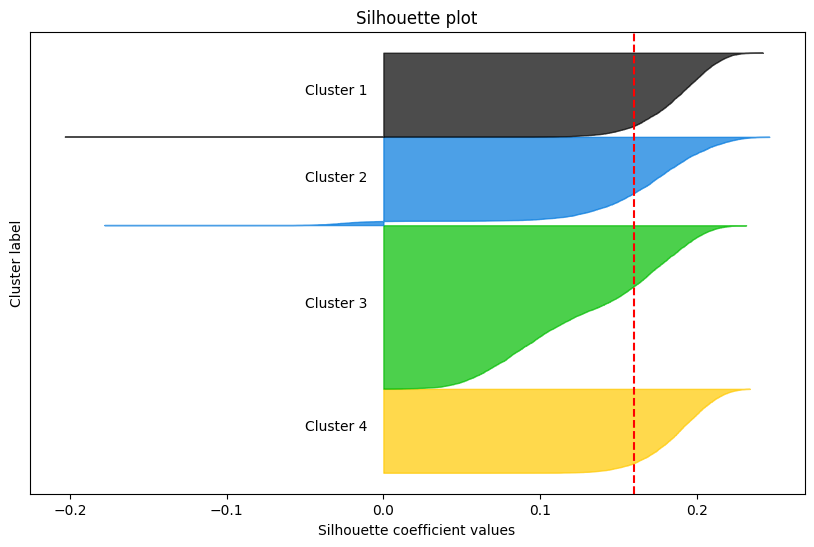

Cluster 1 has average silhouette width: 0.1862745794366417
Cluster 2 has average silhouette width: 0.16216443744832845
Cluster 3 has average silhouette width: 0.13213636529764936
Cluster 4 has average silhouette width: 0.18690769805365248
For the entire dataset, the average silhouette width is: 0.16024159487856524


In [17]:
leader.plot_silhouette()

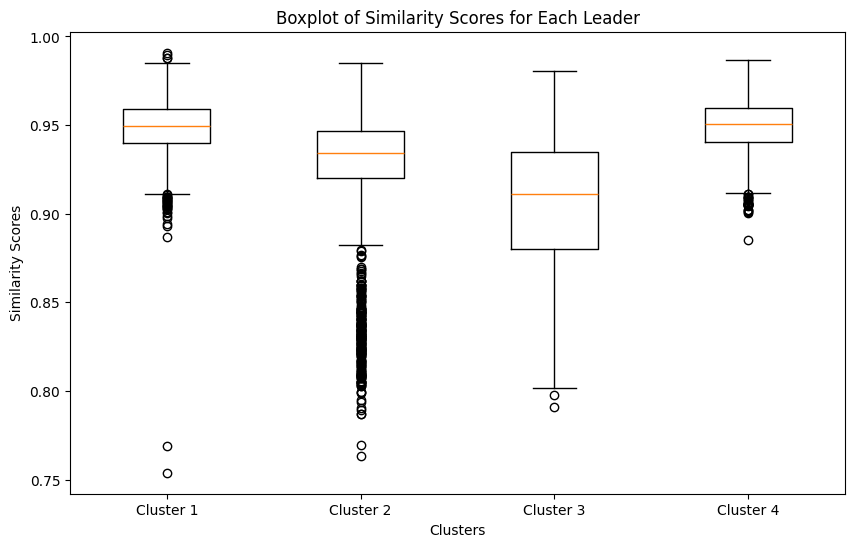

In [18]:
leader.cluster_boxplots()

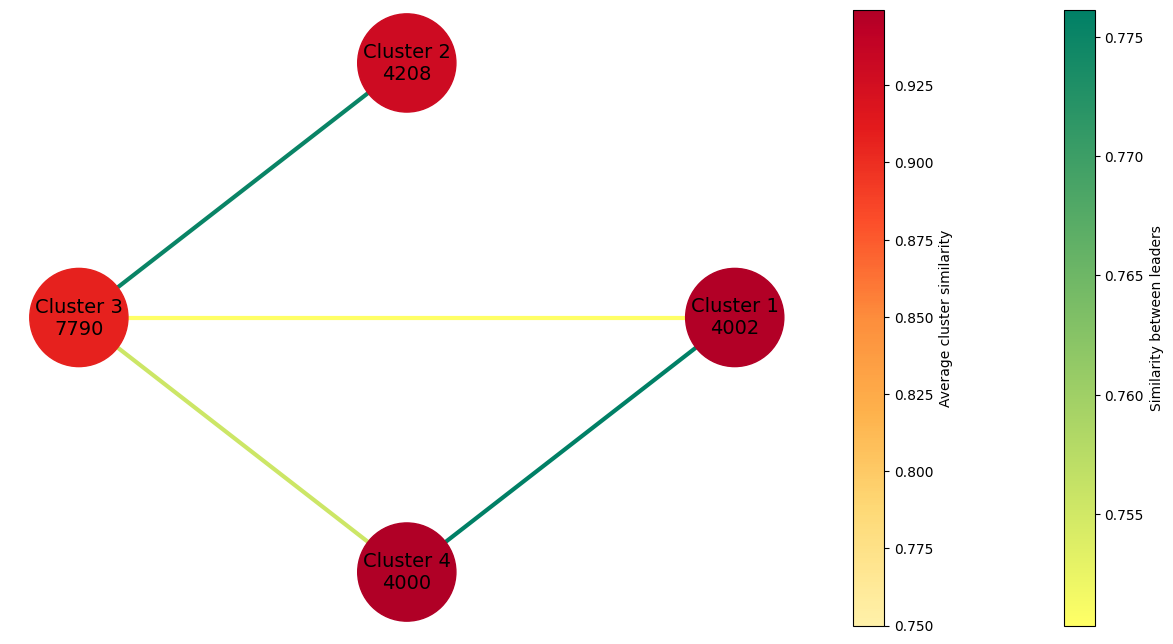

In [19]:
leader.plot_graph()

c:\Users\marti\Desktop\educacio\DADES\TFG\implementation\leader_implementation.py:1327: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(bars, rotation=45, ha='right')


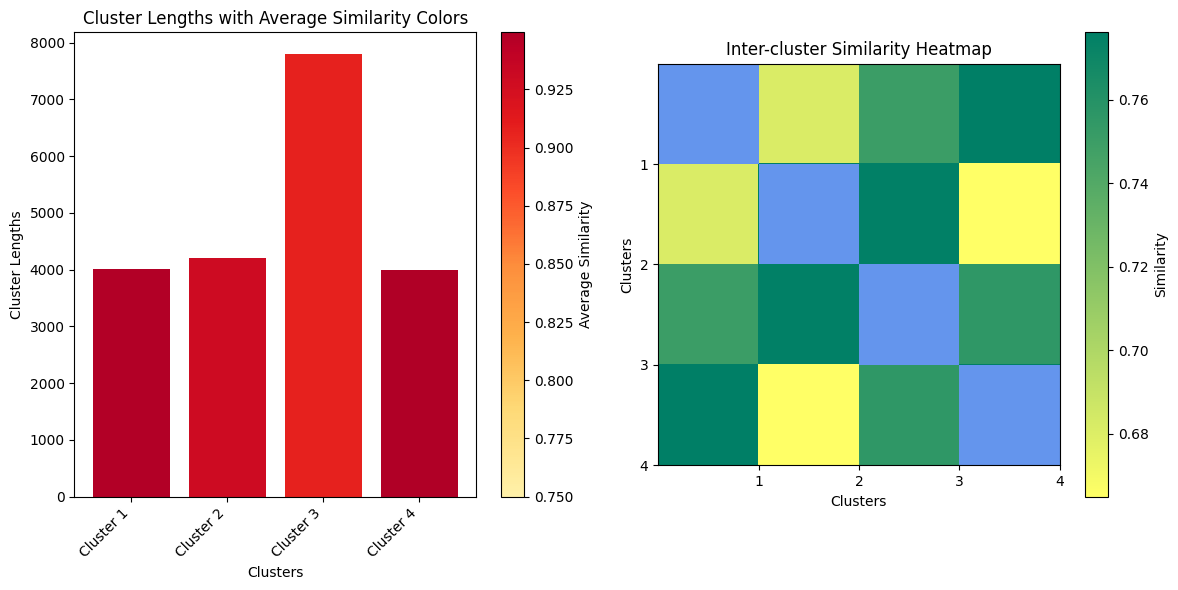

In [20]:
leader.plot_clustering_summary()

### Leader2-Medoid

In [21]:
k2_medoid, leaders2_medoid, clusters2_medoid = leader.Leader2_Medoid(s_min=s_min)

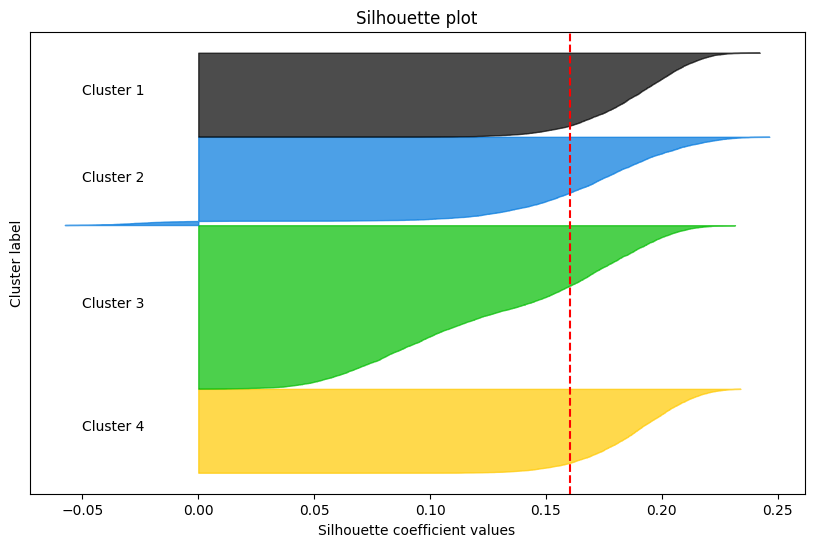

Cluster 1 has average silhouette width: 0.1864550438804293
Cluster 2 has average silhouette width: 0.1622453407956038
Cluster 3 has average silhouette width: 0.13215318750539007
Cluster 4 has average silhouette width: 0.18690769805365248
For the entire dataset, the average silhouette width is: 0.16029434533464687


In [ ]:
leader.plot_silhouette()

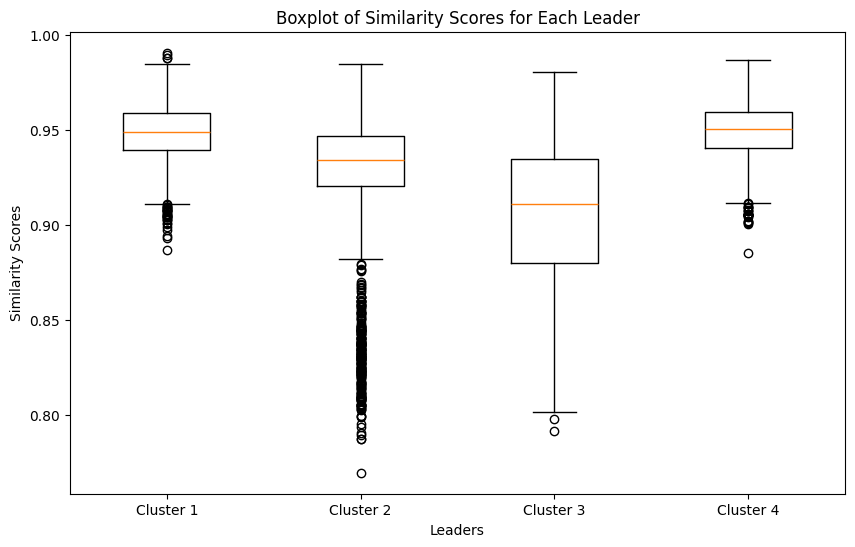

In [ ]:
leader.cluster_boxplots()

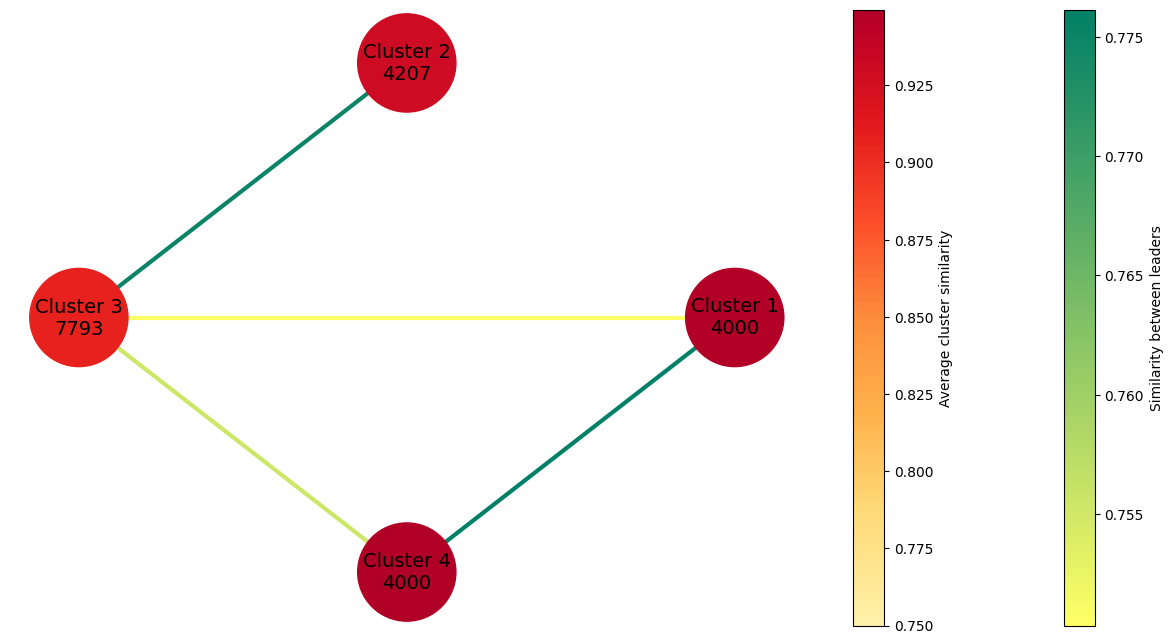

In [ ]:
leader.plot_graph()

c:\Users\marti\Desktop\educacio\DADES\TFG\implementation\leader_implementation.py:1327: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(bars, rotation=45, ha='right')


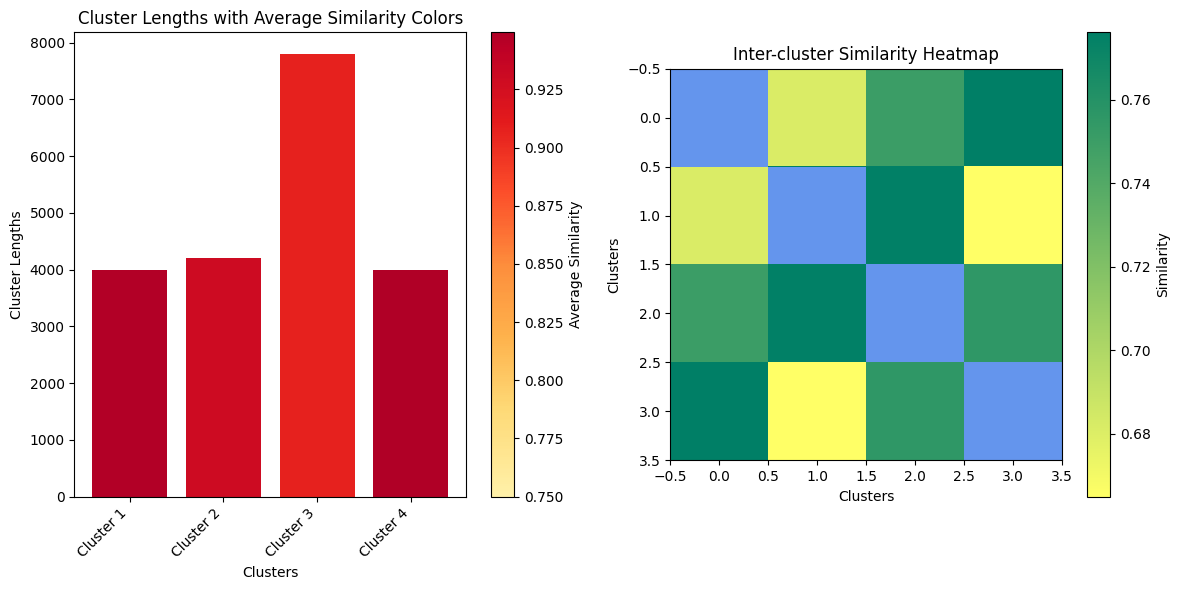

In [ ]:
leader.plot_clustering_summary()

### Leader3 Medoid

In [ ]:
k3_medoid, leaders3_medoid, clusters3_medoid = leader.Leader3_Medoid(s_min=s_min)

             Leader3 Medoid             

=========SUMMARY OF STATISTICS==========

Algorithm executed in 14.576844692230225 seconds

4 clusters have been found:

 Cluster 1     Leader: 2367
               Size: 4000
               Average similarity: 0.9487
----------------------------------------
 Cluster 2     Leader: 4674
               Size: 4014
               Average similarity: 0.9344
----------------------------------------
 Cluster 3     Leader: 11660
               Size: 7985
               Average similarity: 0.9057
----------------------------------------
 Cluster 4     Leader: 19991
               Size: 4001
               Average similarity: 0.9494
----------------------------------------


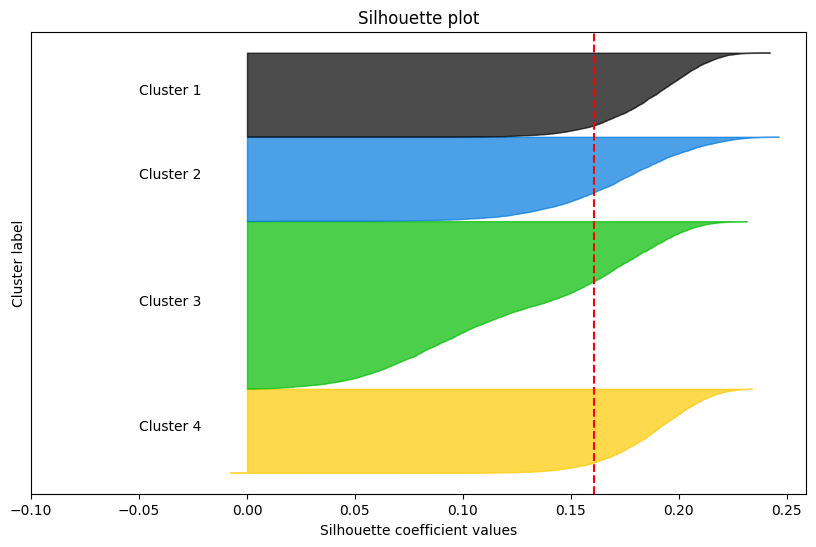

Cluster 1 has average silhouette width: 0.1864550438804293
Cluster 2 has average silhouette width: 0.1713590334767971
Cluster 3 has average silhouette width: 0.1296344281618234
Cluster 4 has average silhouette width: 0.18685901004961442
For the entire dataset, the average silhouette width is: 0.1608204571989124


In [ ]:
leader.plot_silhouette()

In [ ]:
k3_medoid, leaders3_medoid, clusters3_medoid = leader.Leader3_Medoid(s_min=0.8, second_pass=True)

             Leader3 Medoid             

=========SUMMARY OF STATISTICS==========

Algorithm executed in 6.051678895950317 seconds

5 clusters have been found:

 Cluster 1     Leader: 2367
               Size: 3999
               Average similarity: 0.9487
----------------------------------------
 Cluster 2     Leader: 4674
               Size: 3999
               Average similarity: 0.9347
----------------------------------------
 Cluster 3     Leader: 11724
               Size: 4003
               Average similarity: 0.9541
----------------------------------------
 Cluster 4     Leader: 14600
               Size: 3998
               Average similarity: 0.9442
----------------------------------------
 Cluster 5     Leader: 19991
               Size: 4000
               Average similarity: 0.9495
----------------------------------------


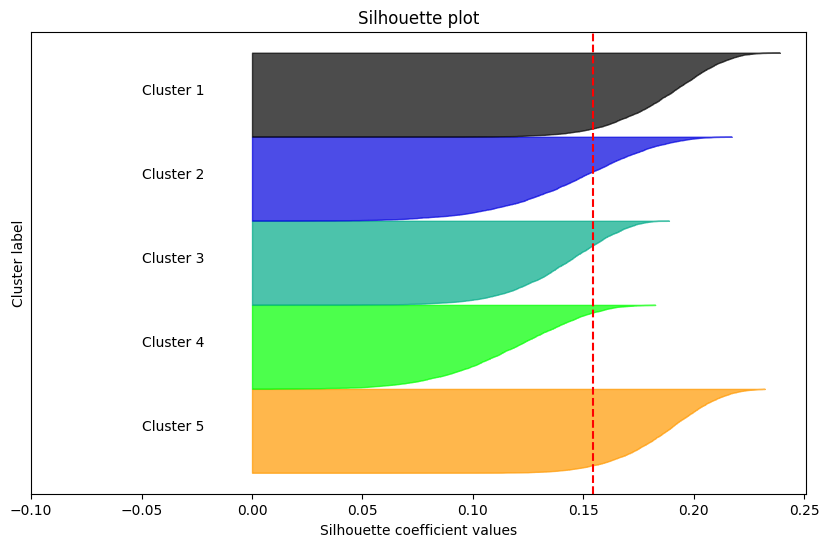

Cluster 1 has average silhouette width: 0.18571692654951358
Cluster 2 has average silhouette width: 0.1443845439879034
Cluster 3 has average silhouette width: 0.13941909007957176
Cluster 4 has average silhouette width: 0.1165456600269651
Cluster 5 has average silhouette width: 0.1854959328746906
For the entire dataset, the average silhouette width is: 0.15431446977403873


In [ ]:
leader.plot_silhouette()